
## What is the most optimal skill to learn for Data Scientists?

### Methodology
* Visualize median salary vs percent skill demand
* Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])
df_DS_US_exploded = df_DS_US.explode('job_skills')
df_DS_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
116,114000.0,r


In [15]:
df_DS_skills = df_DS_US_exploded.groupby(['job_skills'])['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_DS_skills = df_DS_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
DS_job_count = len(df_DS_US)
df_DS_skills['skill_percent'] = df_DS_skills['skill_count'] / DS_job_count * 100
skill_percent = 8.5
df_DS_skills_high_demand = df_DS_skills[df_DS_skills['skill_percent'] > skill_percent]
df_DS_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,3358,131867.0,73.753569
sql,2463,134500.0,54.096200
r,2053,126000.0,45.091149
sas,1022,120000.0,22.446738
tableau,989,125000.0,21.721942
aws,768,134000.0,16.867999
spark,718,135959.5,15.769822
excel,490,124290.0,10.762135
tensorflow,474,149646.0,10.410718


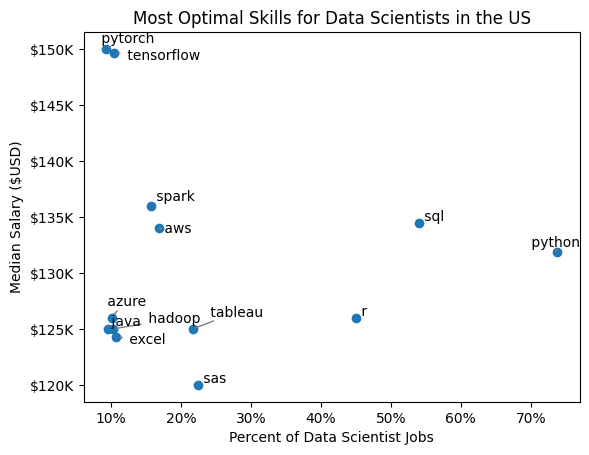

In [18]:
from adjustText import adjust_text

plt.scatter(df_DS_skills_high_demand['skill_percent'], df_DS_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Scientists in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [19]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [20]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['spss',
  'sap',
  'splunk',
  'sharepoint',
  'datarobot',
  'looker',
  'word',
  'microstrategy',
  'ms access',
  'power bi',
  'outlook',
  'powerbi',
  'sheets',
  'excel',
  'sas',
  'ssrs',
  'nuix',
  'tableau',
  'powerpoint',
  'msaccess',
  'qlik',
  'spreadsheet',
  'alteryx',
  'esquisse',
  'cognos',
  'visio',
  'ssis',
  'dax'],
 'programming': ['rust',
  'vba',
  'dart',
  'css',
  'cobol',
  'solidity',
  'c++',
  'visual basic',
  'mongo',
  'lua',
  'c',
  'no-sql',
  'vb.net',
  'haskell',
  'f#',
  'go',
  'shell',
  'c#',
  'swift',
  'powershell',
  'bash',
  'sql',
  'javascript',
  'nosql',
  'apl',
  'groovy',
  'sass',
  'crystal',
  'sas',
  'lisp',
  'erlang',
  'scala',
  'mongodb',
  'elixir',
  'ocaml',
  'fortran',
  'typescript',
  'php',
  'julia',
  'matlab',
  'java',
  'html',
  'objective-c',
  'ruby',
  'visualbasic',
  'delphi',
  'pascal',
  'assembly',
  't-sql',
  'clojure',
  'kotlin',
  'r',
  'perl',
  'golang',
  'pyt

In [21]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns = ['technology', 'skills'])
df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,spss
0,analyst_tools,sap
0,analyst_tools,splunk
0,analyst_tools,sharepoint
0,analyst_tools,datarobot
...,...,...
9,sync,microsoft teams
9,sync,symphony
9,sync,google chat
9,sync,wire


In [23]:
df_plot = df_DS_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

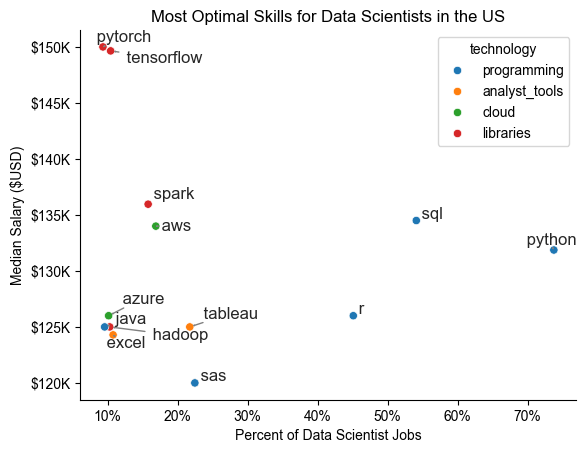

In [25]:
from adjustText import adjust_text

sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.set_theme(style = 'ticks')
sns.despine()

plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Salary ($USD)') 
plt.title('Most Optimal Skills for Data Scientists in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()